In [1]:
!pip install kaggle



In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kofibuabengasamoah","key":"2d37c4db52662b667fe8564ec6813f04"}'}

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
! kaggle datasets download -d gpiosenka/100-bird-species

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/100-bird-species
License(s): CC0-1.0
 99% 1.93G/1.96G [00:22<00:00, 82.8MB/s]
100% 1.96G/1.96G [00:22<00:00, 92.0MB/s]


In [6]:
!unzip 100-bird-species.zip -d bird-species


Streaming output truncated to the last 5000 lines.
  inflating: bird-species/train/WHITE TAILED TROPIC/120.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/121.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/122.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/123.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/124.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/125.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/126.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/127.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/128.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/129.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/130.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/131.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/132.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/133.jpg  
  inflating: bird-species/train/WHITE TAILED TROPIC/134.jpg  
  inflating: bird-s

In [7]:
import tensorflow as tf
import os

# Define paths to training, validation, and test directories
base_dir = 'bird-species'
train_dir = os.path.join(base_dir, 'train')
valid_dir = os.path.join(base_dir, 'valid')
test_dir = os.path.join(base_dir, 'test')




In [10]:
# Define some parameters for the loader
batch_size = 32
img_height = 224
img_width = 224

# Load the training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size

)

# Load the validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 84635 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.
Found 2625 files belonging to 525 classes.


In [36]:

# Print the class names
class_names = train_ds.class_names
print(class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'AFRICAN PYGMY GOOSE', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN DIPPER', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN ROBIN', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'ASIAN GREEN BEE EATER', 'ASIAN OPENBILL STORK', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', '

In [29]:
len(class_names)

525

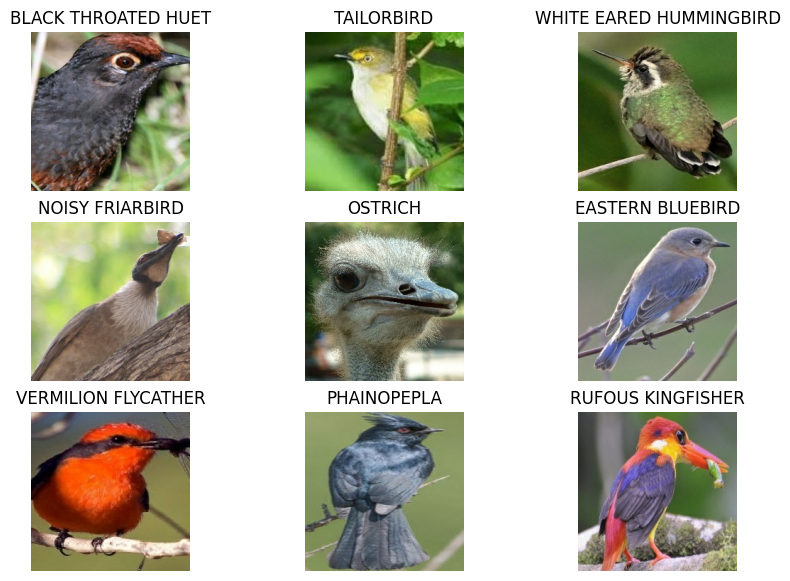

In [14]:
#visulaize
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')


In [ ]:
#https://www.kaggle.com/datasets/gpiosenka/100-bird-species/code
#https://www.kaggle.com/datasets/vipulgote4/solar-power-generation

In [17]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.2),
        layers.RandomZoom(0.4),
    ]
)

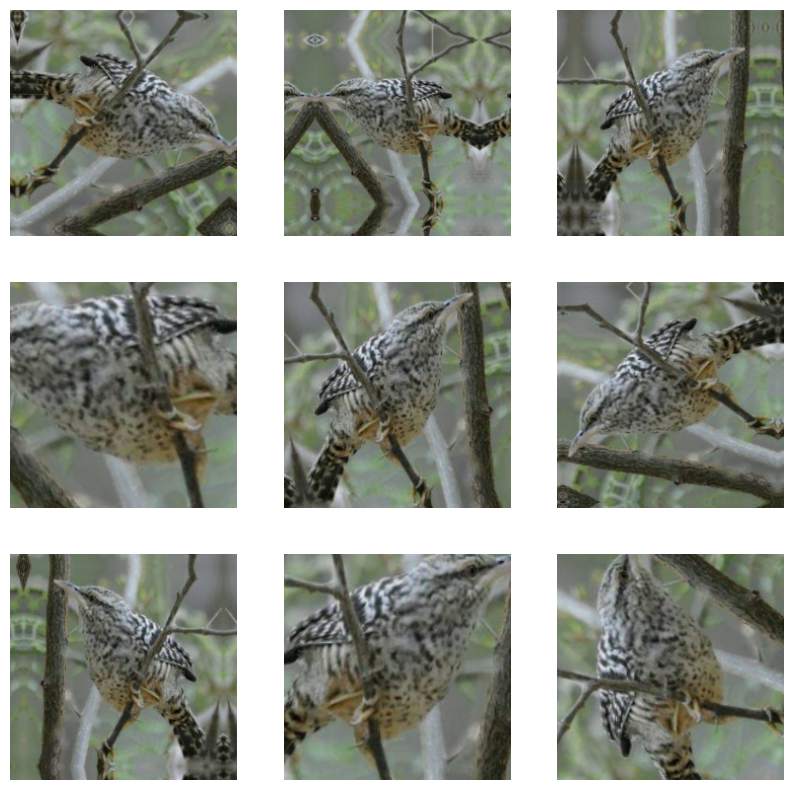

In [18]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [42]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras.models import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.applications import VGG19,ResNet50
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras.models import Model

In [67]:
import tensorflow as tf

def preprocess(image, label):
    label = tf.one_hot(label, 525)
    return image, label

train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

In [58]:
def get_model(input_shape=(224,224,3)):
    model = Sequential()

    # Base Model
    model.add(layers.Conv2D(filters=16, kernel_size=2, input_shape=input_shape, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, padding='same'))

    model.add(layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, padding='same'))

    model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, padding='same'))

    model.add(layers.Conv2D(filters=128, kernel_size=4, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, padding='same'))

    model.add(layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(2, padding='same'))

    #Top Model
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(256))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.2))

    model.add(layers.Dense(525, activation='softmax'))

    model.summary()

    return model



In [59]:
model=get_model()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 batch_normalization_7 (Bat  (None, 224, 224, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_8 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                      

In [60]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 224, 224, 16)      208       
                                                                 
 batch_normalization_7 (Bat  (None, 224, 224, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_8 (Bat  (None, 112, 112, 32)      128       
 chNormalization)                                                
                                                      

In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds)

Epoch 1/10
2645/2645 [==============================] - 141s 49ms/step - loss: 3.3357 - accuracy: 0.3213 - val_loss: 1.6967 - val_accuracy: 0.6156
Epoch 2/10
2645/2645 [==============================] - 128s 48ms/step - loss: 1.7588 - accuracy: 0.5931 - val_loss: 1.3491 - val_accuracy: 0.6830
Epoch 3/10
2645/2645 [==============================] - 128s 48ms/step - loss: 1.2925 - accuracy: 0.6866 - val_loss: 1.3136 - val_accuracy: 0.7368
Epoch 4/10
2645/2645 [==============================] - 130s 49ms/step - loss: 0.9959 - accuracy: 0.7460 - val_loss: 1.3366 - val_accuracy: 0.7402
Epoch 5/10
2645/2645 [==============================] - 130s 49ms/step - loss: 0.7665 - accuracy: 0.7952 - val_loss: 1.1977 - val_accuracy: 0.7379
Epoch 6/10
2645/2645 [==============================] - 132s 50ms/step - loss: 0.5973 - accuracy: 0.8316 - val_loss: 1.1770 - val_accuracy: 0.7653
Epoch 7/10
2645/2645 [==============================] - 128s 48ms/step - loss: 0.4668 - accuracy: 0.8651 - val_loss: 1

In [64]:
model.evaluate(val_ds)

83/83 [==============================] - 4s 39ms/step - loss: 1.1757 - accuracy: 0.7840


[1.175661563873291, 0.7839999794960022]